In [ ]:
import pandas as pd
import numpy as np

csv_path  = '../resources/flood_images_annot.csv'

In [ ]:
df = pd.read_csv(csv_path, parse_dates=['datetime'], index_col=0)
df['level'] = pd.to_numeric(df['level'])
df[df['level']==5] = np.nan

In [ ]:
df_clean = df[df['level']!=0]
mask = df_clean['place'].isna()
df_clean.loc[mask, 'place'] = 'unknown'

print(df_clean['level'].value_counts(normalize=False))
print(df_clean['level'].value_counts(normalize=True))

1.0    78140
2.0     1653
3.0      237
4.0       58
Name: level, dtype: int64
1.0    0.975677
2.0    0.020640
3.0    0.002959
4.0    0.000724
Name: level, dtype: float64


<AxesSubplot:xlabel='level', ylabel='count'>

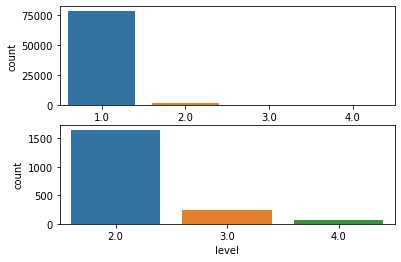

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
sns.countplot(ax=axs[0], x='level', data=df_clean)
sns.countplot(ax=axs[1], x='level', data=df_clean[df_clean['level']!=1])

In [ ]:
df_shop = df_clean[df_clean['place'].str.contains('SHOP')]

print(df_shop['level'].value_counts(normalize=True))

1.0    0.971264
2.0    0.024302
3.0    0.003013
4.0    0.001421
Name: level, dtype: float64


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Github/flood-detection

/content/drive/MyDrive/Github/flood-detection


In [ ]:
git config --global user.email "ample.com"
git config --global user.name "Your Name"

In [4]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   data_proc/analyse_annots.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git commit -a -m 'Github and Colab'


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@5efb05b947d0.(none)')
